In [ ]:
# Load modules
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

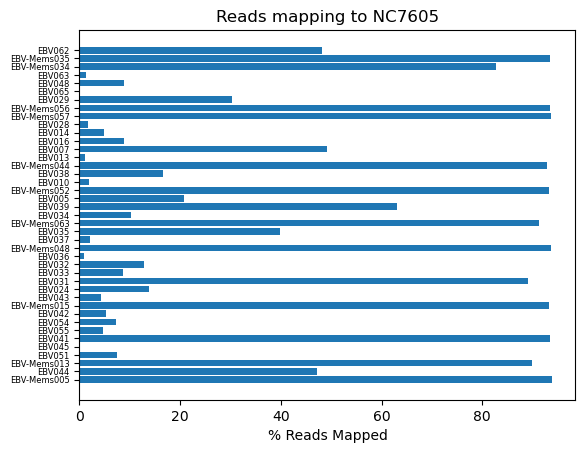

In [4]:
# Specify directory
dir = '/Users/jamesboot/Documents/9.Genome Centre Files/GC-AAA-10836/NC7605-Align'
files = dir + '/*.tsv'

# Find input files
inFiles = glob.glob(files)

# Create sample names from file names
inFileShort = [s.replace(dir+'/', '') for s in inFiles]
samples = [s.replace('.tsv', '') for s in inFileShort]

# Read in files 
DF_list = list()
DF_list = [pd.read_csv(sheet, sep = '\t', names = ['QC-Passed-Reads',
                                                   'QC-Failed-Reads',
                                                   'Metric'], index_col = 2) for sheet in inFiles]

# Create an array of mapping percentages
# Empty array for results to go in
mapping = []
for x in DF_list:
    val = x.loc['mapped %', 'QC-Passed-Reads']
    val2 = float(val.replace('%', ''))
    mapping.append(val2)

#print(mapping)

# Convert to numpy arrays for plotting
x = np.array(samples)
y = np.array(mapping)

plt.barh(x,y)
plt.yticks(fontsize=6)
plt.xlabel("% Reads Mapped")
plt.title('Reads mapping to NC7605')
plt.show()

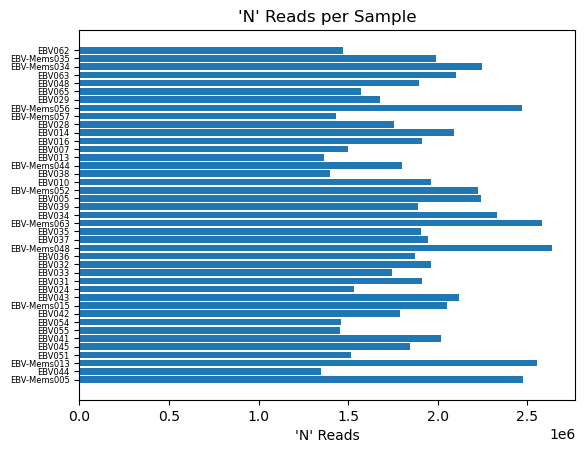

In [3]:
# Make a plot of total numbner of reads for each sample
# Create an array of mapping percentages
# Empty array for results to go in
mapping = []
for x in DF_list:
    val = x.loc['paired in sequencing', 'QC-Passed-Reads']
    val2 = float(val.replace('%', ''))
    mapping.append(val2)

#print(mapping)

# Convert to numpy arrays for plotting
x = np.array(samples)
y = np.array(mapping)

plt.barh(x,y)
plt.yticks(fontsize=6)
plt.xlabel("'N' Reads")
plt.title("'N' Reads per Sample")
plt.show()

[77.23, 77.16, 36.49, 0.76, 27.18, 0.08, 0.66, 5.23, 32.12, 33.19, 0.91, 1.51, 6.09, 1.32, 0.08, 3.54, 66.61, 75.89, 6.0, 1.28, 3.06, 70.89, 7.15, 77.76, 68.59, 76.64, 8.57, 6.4, 3.8, 62.41, 73.51, 44.3, 13.92, 3.43, 74.36, 21.5, 6.55, 11.23, 78.89, 73.45, 9.54]


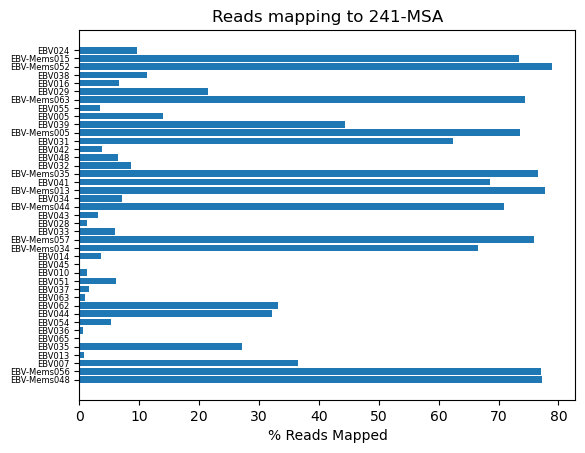

In [49]:
# Specify directory
dir = '/home/genomecentre/Documents/Ade-Analysis/241MSA_AlignQC'
files = dir + '/*.tsv'

# Find input files
inFiles = glob.glob(files)

# Create sample names from file names
inFileShort = [s.replace(dir+'/', '') for s in inFiles]
samples = [s.replace('.tsv', '') for s in inFileShort]

# Read in files 
DF_list = list()
DF_list = [pd.read_csv(sheet, sep = '\t', names = ['QC-Passed-Reads',
                                                   'QC-Failed-Reads',
                                                   'Metric'], index_col = 2) for sheet in inFiles]

# Create an array of mapping percentages
# Empty array for results to go in
mapping = []
for x in DF_list:
    val = x.loc['mapped %', 'QC-Passed-Reads']
    val2 = float(val.replace('%', ''))
    mapping.append(val2)

print(mapping)

# Convert to numpy arrays for plotting
x = np.array(samples)
y = np.array(mapping)

plt.barh(x,y)
plt.yticks(fontsize=6)
plt.xlabel("% Reads Mapped")
plt.title('Reads mapping to 241-MSA')
plt.show()

Text(0.5, 1.0, 'Correlation between viral load and mapping')

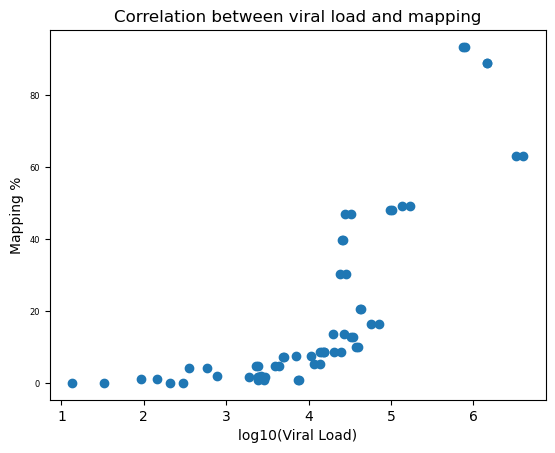

In [45]:
# Corrlate viral loads with mapping 

# Load viral load data
dir = '/Users/jamesboot/Documents/9.Genome Centre Files/GC-AAA-10836'
viralLoad = pd.read_csv(dir+'/viral_loads.csv', header=None)
viralLoad.rename(columns={0:'Sample', 1:'ViralLoad'}, inplace=True)
viralLoad.drop_duplicates(inplace=True)
viralLoad.duplicated()
#print(viralLoad)

# Load mapping data
# Specify directory
dir = '/Users/jamesboot/Documents/9.Genome Centre Files/GC-AAA-10836/NC7605-Align'
files = dir + '/*.tsv'

# Find input files
inFiles = glob.glob(files)

# Create sample names from file names
inFileShort = [s.replace(dir+'/', '') for s in inFiles]
samples = [s.replace('.tsv', '') for s in inFileShort]

# Read in files 
DF_list = list()
DF_list = [pd.read_csv(sheet, sep = '\t', names = ['QC-Passed-Reads',
                                                   'QC-Failed-Reads',
                                                   'Metric'], index_col = 2) for sheet in inFiles]

# Create an array of mapping percentages
# Empty array for results to go in
mapping = []
for x in DF_list:
    val = x.loc['mapped %', 'QC-Passed-Reads']
    val2 = float(val.replace('%', ''))
    mapping.append(val2)

# Create pandas dataframe
mappingD = {'Sample': samples, 'Mapping': mapping}
mappingDF = pd.DataFrame(data=mappingD)
#print(mappingDF)

# Merge dataframes
mergeDF = viralLoad.merge(mappingDF, left_on='Sample', right_on='Sample')
#print(mergeDF)

# Log transform viral load
mergeDF['log_ViralLoad'] = np.log10(mergeDF['ViralLoad'])

# Plot
plt.scatter(x=mergeDF['log_ViralLoad'], y = mergeDF['Mapping'])
plt.yticks(fontsize=6)
plt.xlabel("log10(Viral Load)")
plt.ylabel("Mapping %")
plt.title('Correlation between viral load and mapping')

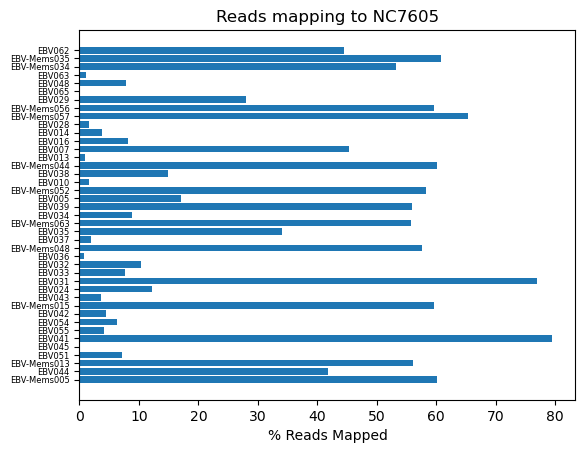

In [3]:
# Specify directory
dir = '/Users/jamesboot/Documents/9.Genome Centre Files/GC-AAA-10836/NC7605-Align-HardTrim'
files = dir + '/*.tsv'

# Find input files
inFiles = glob.glob(files)

# Create sample names from file names
inFileShort = [s.replace(dir+'/', '') for s in inFiles]
samples = [s.replace('.tsv', '') for s in inFileShort]

# Read in files 
DF_list = list()
DF_list = [pd.read_csv(sheet, sep = '\t', names = ['QC-Passed-Reads',
                                                   'QC-Failed-Reads',
                                                   'Metric'], index_col = 2) for sheet in inFiles]

# Create an array of mapping percentages
# Empty array for results to go in
mapping = []
for x in DF_list:
    val = x.loc['mapped %', 'QC-Passed-Reads']
    val2 = float(val.replace('%', ''))
    mapping.append(val2)

#print(mapping)

# Convert to numpy arrays for plotting
x = np.array(samples)
y = np.array(mapping)

plt.barh(x,y)
plt.yticks(fontsize=6)
plt.xlabel("% Reads Mapped")
plt.title('Reads mapping to NC7605')
plt.show()